In [17]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
plt.style.use("science")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [105]:
def normal(x):
    return 1/(0.1*np.sqrt(2*np.pi)) * np.exp(-((x-0.5)/0.1)**2 /(2))

def move(x):
    x_new = np.random.rand()
    p = normal(x)
    p_new = normal(x_new)
    alpha = min(p_new / p, 1.0)
    r = np.random.rand()
    if alpha >= r:
        x = x_new
    return x

In [110]:
samples = []
x = 0
for i in range(50000):
    x = move(x)
    samples.append(x)

In [111]:
np.average(samples)

0.5009568221720884

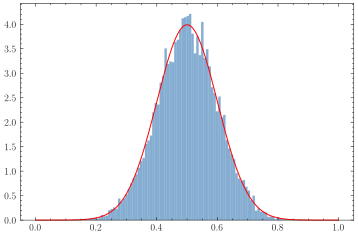

In [115]:
x = np.linspace(0, 1, len(samples))
plt.hist(samples,bins=100,density=True,alpha=0.5)
plt.plot(x,normal(x),color='red')
plt.savefig('yang.png')

In [109]:
def choose_next(p,p_vec):
    _sum = 0
    for i,pp in enumerate(p_vec):
        _sum += pp
        if p < _sum:
            return i

In [15]:
A = np.array([0.1,0.4,0.5,\
              0.3,0.1,0.6,\
              0.2,0.2,0.6]).reshape(3,3) 

In [13]:
np.linalg.matrix_power(A,20)

array([[0.20168067, 0.21848739, 0.57983193],
       [0.20168067, 0.21848739, 0.57983193],
       [0.20168067, 0.21848739, 0.57983193]])

In [8]:
x = 0
x_list = []
for i in range(10000):
    p = np.random.rand()
    x = choose_next(p,A[x])
    x_list.append(x)
x_list = np.array(x_list)

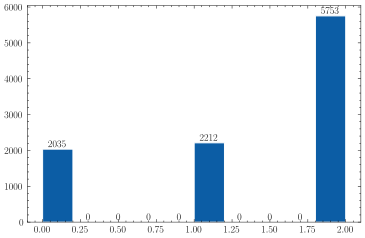

In [116]:
freq, bins, patches = plt.hist(x_list, edgecolor='white', label='d',)

bin_centers = np.diff(bins)*0.5 + bins[:-1]

for n,(fr, x, patch) in enumerate(zip(freq, bin_centers, patches)):
    height = int(freq[n])
    plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
plt.savefig('shen.png')